# Machine Learning Models to Predict Coffee Quality

We used several machine learning models from the **Scikit-Learn**, **Tensorflow** and **Keras** libraries to predict coffee quality scores based on several attributes as defined by the Coffee Quality Institute. Coffee is evaluated by licensed quality graders ("Q Graders") based on several criteria, including aroma, flavor, aftertaste, acidity, body, balance, uniformity, clean cup, sweetness, cupper points and defects. We considered these criteria, as well as country of origin, region, farm owner, farm name, mean farm altitude and processing method to determine which factors most influence the overall quality of a coffee, and to predict coffee quality scores on a set of "testing" data, based on a set of "training" data.

Essentially, we want to answer the following question...

What makes a *really good* cup of coffee?

Coffee Quality Institute: https://www.coffeeinstitute.org/
Data Source: https://github.com/jldbc/coffee-quality-database

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np # for ravel() method

# preprocessing libraries
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ML modeling libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
import warnings
warnings.filterwarnings('ignore')

After importing all necessary libraries and dependencies, we load the data. There are two datasets here--one for arabica coffee and one for robusta coffee. Columns are slightly different for the two datasets, so we previewed and renamed as needed before combining them. We then removed any unnecessary columns and null values, and renamed a few columns.

In [3]:
# load the data
df1 = pd.read_csv('arabica_data_cleaned.csv')
df2 = pd.read_csv('robusta_data_cleaned.csv')

In [4]:
# compare column names
print(df1.columns)
print(df2.columns)

Index(['Unnamed: 0', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')
Index(['Unnamed: 0', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
     

In [5]:
# rename columns to prepare for df merge
df2 = df2.rename(columns={
    'Fragrance...Aroma':'Aroma',
    'Salt...Acid':'Acidity',
    'Bitter...Sweet':'Sweetness',
    'Mouthfeel':'Body',
    'Uniform.Cup':'Uniformity'
})

In [6]:
# merge dfs
df = df1.append(df2)
df

,Acidity,Aftertaste,Altitude,Aroma,Bag.Weight,Balance,Body,Category.One.Defects,Category.Two.Defects,Certification.Address,...,Species,Sweetness,Total.Cup.Points,Uniformity,Unnamed: 0,Variety,altitude_high_meters,altitude_low_meters,altitude_mean_meters,unit_of_measurement
0,8.75,8.67,1950-2200,8.67,60 kg,8.42,8.50,0,0,309fcf77415a3661ae83e027f7e5f05dad786e44,...,Arabica,10.00,90.58,10.00,1,NaN,2200.0,1950.0,2075.0,m
1,8.58,8.50,1950-2200,8.75,60 kg,8.42,8.42,0,1,309fcf77415a3661ae83e027f7e5f05dad786e44,...,Arabica,10.00,89.92,10.00,2,Other,2200.0,1950.0,2075.0,m
2,8.42,8.42,1600 - 1800 m,8.42,1,8.42,8.33,0,0,36d0d00a3724338ba7937c52a378d085f2172daa,...,Arabica,10.00,89.75,10.00,3,Bourbon,1800.0,1600.0,1700.0,m
3,8.42,8.42,1800-2200,8.17,60 kg,8.25,8.50,0,2,309fcf77415a3661ae83e027f7e5f05dad786e44,...,Arabica,10.00,89.00,10.00,4,NaN,2200.0,1800.0,2000.0,m
4,8.50,8.25,1950-2200,8.25,60 kg,8.33,8.42,0,2,309fcf77415a3661ae83e027f7e5f05dad786e44,...,Arabica,10.00,88.83,10.00,5,Other,2200.0,1950.0,2075.0,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,7.58,7.33,NaN,7.75,2 kg,7.83,5.08,0,1,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,...,Robusta,7.75,78.75,10.00,24,NaN,NaN,NaN,NaN,m
24,7.75,7.75,40,7.50,2 kg,5.25,5.17,0,0,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,...,Robusta,8.42,78.08,10.00,25,NaN,40.0,40.0,40.0,m
25,7.42,7.17,795 meters,7.33,1 kg,7.17,7.50,0,6,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,...,Robusta,7.42,77.17,9.33,26,NaN,795.0,795.0,795.0,m
26,7.17,6.75,NaN,7.42,5 lbs,7.00,7.25,20,1,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,...,Robusta,7.08,75.08,9.33,27,NaN,NaN,NaN,NaN,m


In [7]:
df = df[['Species', 'Country.of.Origin', 'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
         'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points','Category.One.Defects',
         'Category.Two.Defects','Total.Cup.Points', 'Owner','Farm.Name','Region','altitude_mean_meters']].dropna()

df = df.rename(columns={
    'Country.of.Origin': 'Country of Origin', 
    'Processing.Method': 'Processing Method',
    'Clean.Cup': 'Clean Cup',
    'Cupper.Points':'Cupper Points',
    'Category.One.Defects':'Category One Defects',
    'Category.Two.Defects':'Category Two Defects',
    'Total.Cup.Points':'Total Cup Points',
    'Farm.Name':'Farm Name',
    'altitude_mean_meters':'Mean Altitude'
})

We then plotted the individual numerical features against **Total Cup Points** to determine which machine learning models would be most appropriate. Because the data appears to be linear, we began with the `sklearn.linear_model` models.

<IPython.core.display.Javascript object>


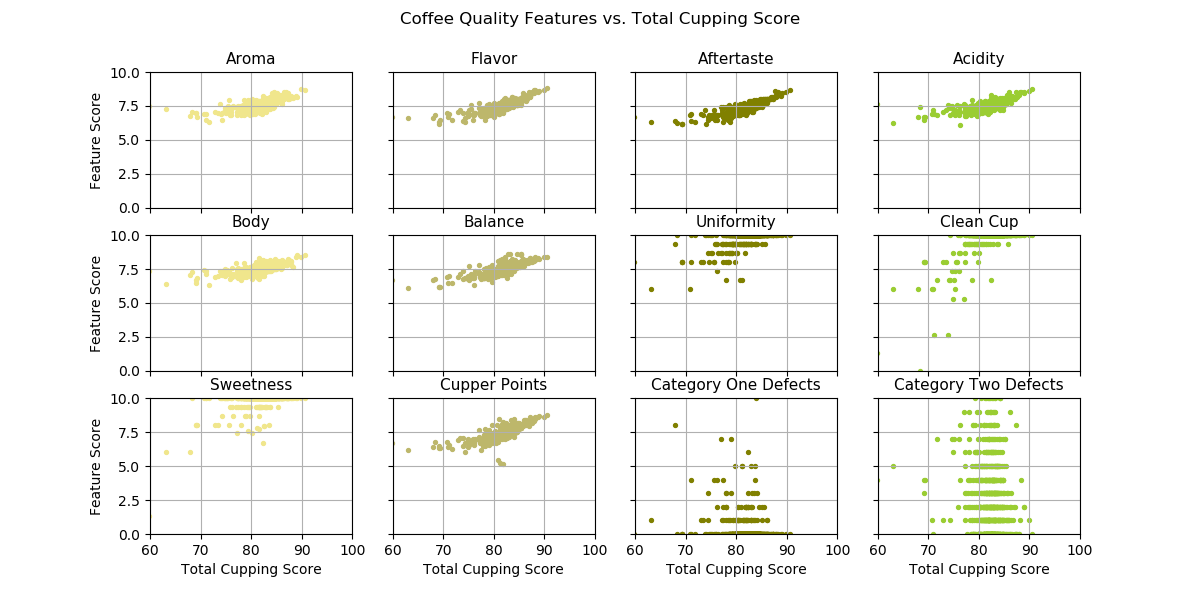

In [8]:
fig1, ax1 = plt.subplots(3,4, figsize=(12,6), sharex=True, sharey=True)

ax1[0, 0].scatter(df['Total Cup Points'], df['Aroma'], color='khaki' , s=8 , label='Aroma')
ax1[0, 0].set_title('Aroma', size=11)

ax1[0, 1].scatter(df['Total Cup Points'], df['Flavor'], color='darkkhaki' , s=8 , label='Flavor')
ax1[0, 1].set_title('Flavor', size=11)

ax1[0, 2].scatter(df['Total Cup Points'], df['Aftertaste'], color='olive' , s=8 , label='Aftertaste')
ax1[0, 2].set_title('Aftertaste', size=11)

ax1[0, 3].scatter(df['Total Cup Points'], df['Acidity'], color='yellowgreen' , s=8 , label='Acidity')
ax1[0, 3].set_title('Acidity', size=11)

ax1[1, 0].scatter(df['Total Cup Points'], df['Body'], color='khaki' , s=8 , label='Body')
ax1[1, 0].set_title('Body', size=11)

ax1[1, 1].scatter(df['Total Cup Points'], df['Balance'], color='darkkhaki' , s=8 , label='Balance')
ax1[1, 1].set_title('Balance', size=11)

ax1[1, 2].scatter(df['Total Cup Points'], df['Uniformity'], color='olive' , s=8 , label='Uniformity')
ax1[1, 2].set_title('Uniformity', size=11)

ax1[1, 3].scatter(df['Total Cup Points'], df['Clean Cup'], color='yellowgreen' , s=8 , label='Clean Cup')
ax1[1, 3].set_title('Clean Cup', size=11)

ax1[2, 0].scatter(df['Total Cup Points'], df['Sweetness'], color='khaki' , s=8 , label='Sweetness')
ax1[2, 0].set_title('Sweetness', size=11)

ax1[2, 1].scatter(df['Total Cup Points'], df['Cupper Points'], color='darkkhaki' , s=8 , label='Cupper Points')
ax1[2, 1].set_title('Cupper Points', size=11)

ax1[2, 2].scatter(df['Total Cup Points'], df['Category One Defects'], color='olive' , s=8 , label='Category One Defects')
ax1[2, 2].set_title('Category One Defects', size=11)

ax1[2, 3].scatter(df['Total Cup Points'], df['Category Two Defects'], color='yellowgreen' , s=8 , label='Category Two Defects')
ax1[2, 3].set_title('Category Two Defects', size=11)

for ax in ax1.flat:
    ax.set(xlabel='Total Cupping Score', ylabel='Feature Score', xlim=[60, 100], ylim=[0, 10])
    ax.label_outer()
    ax.grid()

fig1.suptitle('Coffee Quality Features vs. Total Cupping Score')
fig1.savefig('Images_ADDING_FEATURES/initial_features_vs_total_score.jpg')
fig1.show()

# Preprocessing

Before modeling, we determined which columns will be our X and y values. Because we are predicting quality based on coffee attributes, we decided our y value would be **Total Cup Points** (basically, the total coffee score) and our X values would be everything else--all grading criteria as well as a few other descriptive attributes. Because some of our X values were categorical in nature (Country of Origin and Processing Method),  we encoded X using `Ordinal Encoder` before splitting our data into training and testing sets. This method retained all values in a single column and assiged an integer to each unique string, rather than using binary encoding to create two dummy columns for each unique value. We then split the data into training (80%) and testing (20%) sets.

In [9]:
X = df.drop('Total Cup Points', axis=1)
y = df['Total Cup Points'].values.reshape(-1,1)

print(X.shape,y.shape)

(832, 19) (832, 1)


In [10]:
# use OrdinalEncoder to convert categorical data to integers
ord_enc = OrdinalEncoder()
X_encoded = ord_enc.fit(X).transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Modeling

We trained several models on our data--4 linear models (linear regression, lasso, ridge and elasticnet), support vector regression, random forest regression and normal and deep neural networks.

# Linear Models

All the linear models performed quite well, all with over 99% accuracy, and did not require hyperparameter tuning. Predicted scores for each model were plotted against actual scores using `Matplotlib` subplots to compare them side by side.

## Linear Regression Model

In [12]:
linregress = LinearRegression()
linregress.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
print(f"Training Data Score: {linregress.score(X_train, y_train)}")
print(f"Testing Data Score: {linregress.score(X_test, y_test)}")

Training Data Score: 0.9916203480917819
Testing Data Score: 0.9964894259178114


## Lasso Model

In [14]:
lasso = Lasso(alpha=.01).fit(X_train, y_train)

In [15]:
print(f"Training Data Score: {lasso.score(X_train, y_train)}")
print(f"Testing Data Score: {lasso.score(X_test, y_test)}")

Training Data Score: 0.9910070509033735
Testing Data Score: 0.997083821379836


## Ridge Model

In [16]:
ridge = Ridge(alpha=.01).fit(X_train, y_train)

In [17]:
print(f"Training Data Score: {ridge.score(X_train, y_train)}")
print(f"Testing Data Score: {ridge.score(X_test, y_test)}")

Training Data Score: 0.9916203428646563
Testing Data Score: 0.9964948625805518


## ElasticNet Model

In [18]:
elasticnet = ElasticNet(alpha=.01).fit(X_train, y_train)

In [19]:
print(f"Training Data Score: {elasticnet.score(X_train, y_train)}")
print(f"Testing Data Score: {elasticnet.score(X_test, y_test)}")

Training Data Score: 0.9910346282019498
Testing Data Score: 0.9970967093407702


In [20]:
# combine all actual and predicted values into one df

# predicted scores for each model
pred_linreg = linregress.predict(X_test).ravel().tolist()
pred_lasso = lasso.predict(X_test).ravel().tolist()
pred_ridge = ridge.predict(X_test).ravel().tolist()
pred_elasticnet = elasticnet.predict(X_test).ravel().tolist()

# actual scores
actual = y_test.ravel().tolist()

linear_prediction_df = pd.DataFrame({
    'Linear Regression Prediction': pred_linreg, 
    'Lasso Prediction': pred_lasso, 
    'Ridge Prediction': pred_ridge, 
    'ElasticNet Prediction': pred_elasticnet, 
    'Actual': actual})

linear_prediction_df.head()

,Linear Regression Prediction,Lasso Prediction,Ridge Prediction,ElasticNet Prediction,Actual
0,81.013302,80.987190,81.013275,80.994702,81.00
1,69.504048,69.640507,69.504296,69.621229,69.17
2,82.869568,82.867029,82.869571,82.867577,82.92
3,81.395735,81.395444,81.395730,81.393412,81.42
4,83.660663,83.668707,83.660685,83.668283,83.67


<IPython.core.display.Javascript object>


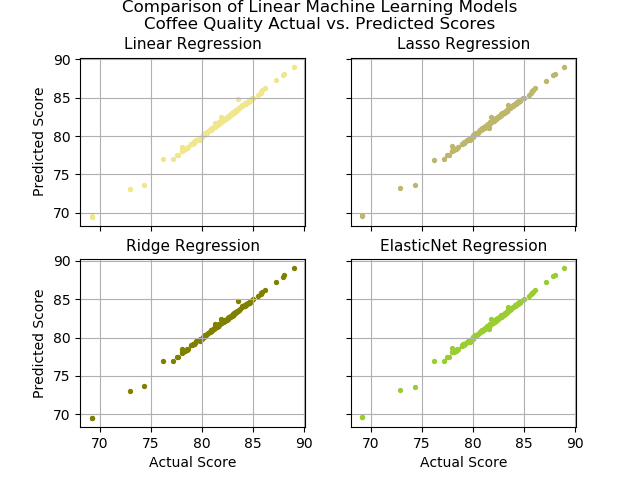

In [21]:
fig2, axs2 = plt.subplots(2,2, sharex=True, sharey=True)

axs2[0, 0].scatter(linear_prediction_df['Actual'], linear_prediction_df['Linear Regression Prediction'], color='khaki' , s=8 , label='Linear Regression')
axs2[0, 0].set_title('Linear Regression', size=11)

axs2[0, 1].scatter(linear_prediction_df['Actual'], linear_prediction_df['Lasso Prediction'], color='darkkhaki' , s=8 , label='Lasso')
axs2[0, 1].set_title('Lasso Regression', size=11)

axs2[1, 0].scatter(linear_prediction_df['Actual'], linear_prediction_df['Ridge Prediction'], color='olive' , s=8 , label='Ridge')
axs2[1, 0].set_title('Ridge Regression', size=11)

axs2[1, 1].scatter(linear_prediction_df['Actual'], linear_prediction_df['ElasticNet Prediction'], color='yellowgreen' , s=8 , label='ElasticNet ')
axs2[1, 1].set_title('ElasticNet Regression', size=11)

for ax in axs2.flat:
    ax.set(xlabel='Actual Score', ylabel='Predicted Score')
    ax.label_outer()
    ax.grid()

fig2.suptitle('Comparison of Linear Machine Learning Models\nCoffee Quality Actual vs. Predicted Scores', y=1)
fig2.savefig('Images_ADDING_FEATURES/linear_models_prediction_vs_actual.jpg')
fig2.show()

# Support Vector Regression

We used `SVR`, a regressor, instead of `SVC`, a classifier, because our y values were continuous integers, not discrete classes. The initial testing and training scores were quite low, so we used `GridSearchCV` to retune the model parameters until the scores improved. Hyperparameter tuning was successful, as evidenced by the plot comparing predicted/actual scores for the untuned and retuned models.

In [22]:
model_svr = svm.SVR()
model_svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [23]:
print(f"Training Data Score: {model_svr.score(X_train, y_train)}")
print(f"Testing Data Score: {model_svr.score(X_test, y_test)}")

Training Data Score: 0.3464764484174684
Testing Data Score: 0.002628734034173963


#### Hyperparameter Tuning

In [24]:
params_svr = {
    'C': [1000,1200,1300],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto'],
    'max_iter': [2000,2250,2500]
}
grid_svr = GridSearchCV(model_svr, params_svr)

In [25]:
grid_svr.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1000, 1200, 1300], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear'],
                         'max_iter': [2000, 2250, 2500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [26]:
print(grid_svr.best_params_)
print(grid_svr.best_score_)

{'C': 1200, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 2250}
0.9692342874636354


#### Retune the Model

In [27]:
model_svr_retuned = svm.SVR(C=1200, gamma='scale', kernel='rbf', max_iter=2250)
model_svr_retuned.fit(X_train, y_train)

SVR(C=1200, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=2250, shrinking=True, tol=0.001, verbose=False)

In [28]:
print(f"Retuned Training Data Score: {model_svr_retuned.score(X_train, y_train)}")
print(f"Retuned Testing Data Score: {model_svr_retuned.score(X_test, y_test)}")

Retuned Training Data Score: 0.9853946131590589
Retuned Testing Data Score: 0.9823676251225792


In [29]:
pred_untuned_svr = model_svr.predict(X_test).ravel().tolist()
pred_tuned_svr = model_svr_retuned.predict(X_test).ravel().tolist()
actual = y_test.ravel().tolist() # this is same as above, used in linear models--ok to delete if we use all plots

df_svr_predictions = pd.DataFrame({'Untuned Predictions': pred_untuned_svr, 'Tuned Predictions': pred_tuned_svr, 'Actual': actual})

df_svr_predictions.head()

,Untuned Predictions,Tuned Predictions,Actual
0,82.240187,80.685575,81.00
1,81.971941,70.053434,69.17
2,82.666782,82.769792,82.92
3,82.240203,80.955456,81.42
4,82.283124,83.988534,83.67


<IPython.core.display.Javascript object>


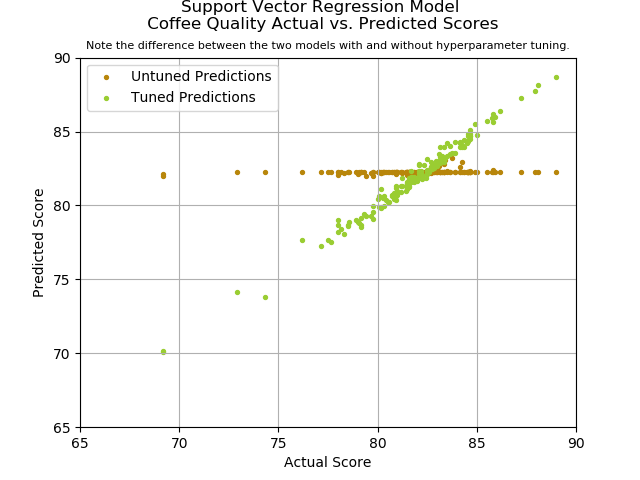

In [30]:
fig3, ax3 = plt.subplots()

ax3.scatter(df_svr_predictions['Actual'], df_svr_predictions['Untuned Predictions'], color='darkgoldenrod', s=8, label='Untuned Predictions')
ax3.scatter(df_svr_predictions['Actual'], df_svr_predictions['Tuned Predictions'], color='yellowgreen', s=8, label='Tuned Predictions')
plt.suptitle('Support Vector Regression Model\n Coffee Quality Actual vs. Predicted Scores',fontsize=12, y=1, ha='center')
plt.title('Note the difference between the two models with and without hyperparameter tuning.',fontsize=8, ha='center')
ax3.legend()
ax3.grid()
plt.xlim((65,90))
plt.ylim((65,90))
plt.ylabel('Predicted Score')
plt.xlabel('Actual Score')
fig3.savefig('Images_ADDING_FEATURES/SVR_tuned_vs_untuned_predictions_vs_actuals.jpg')
fig3.show()

# Random Forest Regressor Model

Again, we used a regressor (`RandomForestRegressor` instead of `RandomForestClassifier`) because our y values were continuous integers, not discrete classes. This model did not perform as well as the linear models or the retuned `SVR` model. Even with hyperparameter tuning, the R2 score decreased. Again, we plotted the predicted/actual scores for the tuned and untuned models.

We did uncover some new information from the random forest regression, however. We were able to answer our initial question of "what makes a really good cup of coffee?" i.e. which *features* are most important when evaluating coffee quality? We examined the most important features used for the model and found that *clean cup* had the most impact on coffee quality, followed by *flavor* and *aftertaste*.

In [31]:
model_rfr = RandomForestRegressor()
model_rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [32]:
print(f"Training Data Score: {model_rfr.score(X_train, y_train)}")
print(f"Testing Data Score: {model_rfr.score(X_test, y_test)}")

Training Data Score: 0.9814877671524902
Testing Data Score: 0.9499298577395933


In [33]:
pred_rfr = model_rfr.predict(X_test).ravel().tolist()
actual = y_test.ravel().tolist() # this is same as above, used in linear models--ok to delete if we use all plots

df_rfr_predictions = pd.DataFrame({'Prediction': pred_rfr, 'Actual': actual})

df_rfr_predictions.head()

,Prediction,Actual
0,80.900,81.00
1,71.950,69.17
2,83.043,82.92
3,81.458,81.42
4,83.633,83.67


#### Hyperparameter Tuning

In [34]:
params_rf = {
    'n_estimators': [400,500,600],
    'bootstrap': [True, False],
    'warm_start': [True, False]
}
grid_rf = GridSearchCV(model_rfr, params_rf)

In [35]:
grid_rf.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'bootstrap': [True, False],
  

In [36]:
print(grid_rf.best_params_)
print(grid_rf.best_score_)

### TUNING DECREASED THE SCORE ###

{'bootstrap': True, 'n_estimators': 400, 'warm_start': True}
0.9182604312570424


In [37]:
# the retuned model performs worse than the original model
model_rfr_retuned = RandomForestRegressor()
model_rfr_retuned.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [38]:
print(f"Training Data Score: {model_rfr_retuned.score(X_train, y_train)}")
print(f"Testing Data Score: {model_rfr_retuned.score(X_test, y_test)}")

Training Data Score: 0.979231022392943
Testing Data Score: 0.9583026333715475


In [39]:
pred_untuned_rfr = model_rfr.predict(X_test).ravel().tolist()
pred_tuned_rfr = model_rfr_retuned.predict(X_test).ravel().tolist()
actual = y_test.ravel().tolist() # this is same as above, used in linear models--ok to delete if we use all plots

df_rfr_predictions = pd.DataFrame({'Untuned Predictions': pred_untuned_rfr, 'Tuned Predictions': pred_tuned_rfr, 'Actual': actual})

df_rfr_predictions.head()

,Untuned Predictions,Tuned Predictions,Actual
0,80.900,80.808,81.00
1,71.950,70.474,69.17
2,83.043,82.859,82.92
3,81.458,81.583,81.42
4,83.633,83.569,83.67


<IPython.core.display.Javascript object>


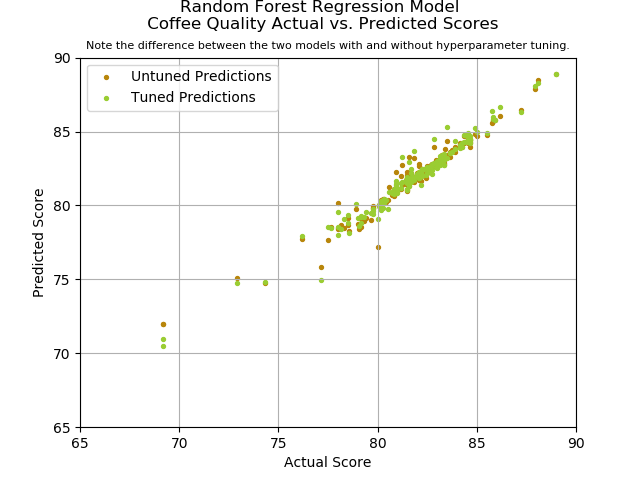

In [40]:
fig4, ax4 = plt.subplots()

ax4.scatter(df_rfr_predictions['Actual'], df_rfr_predictions['Untuned Predictions'], color='darkgoldenrod', s=8, label='Untuned Predictions')
ax4.scatter(df_rfr_predictions['Actual'], df_rfr_predictions['Tuned Predictions'], color='yellowgreen', s=8, label='Tuned Predictions')
plt.suptitle('Random Forest Regression Model\n Coffee Quality Actual vs. Predicted Scores',fontsize=12, y=1, ha='center')
plt.title('Note the difference between the two models with and without hyperparameter tuning.',fontsize=8, ha='center')
plt.grid()
plt.legend()
plt.xlim((65, 90))
plt.ylim((65, 90))
plt.ylabel('Predicted Score')
plt.xlabel('Actual Score')
fig4.savefig('Images_ADDING_FEATURES/RFR_tuned_vs_untuned_predictions_vs_actuals.jpg')
fig4.show()

In [41]:
importances = model_rfr.feature_importances_
df_imp = pd.DataFrame(sorted(zip(importances, df.columns), reverse=True)).rename(columns={0:'Value', 1:'Feature'})
df_imp

,Value,Feature
0,0.330811,Clean Cup
1,0.212216,Flavor
2,0.133022,Aftertaste
3,0.110301,Cupper Points
4,0.091204,Balance
5,0.042120,Sweetness
6,0.021057,Uniformity
7,0.017734,Aroma
8,0.012149,Acidity
9,0.010089,Body


<IPython.core.display.Javascript object>


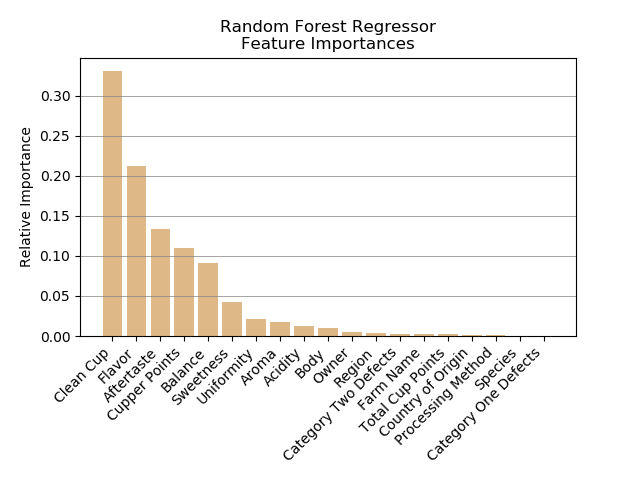

In [55]:
fig5, ax5 = plt.subplots()

plt.subplots_adjust(bottom=0.3)
ax5.bar(df_imp['Feature'], df_imp['Value'], color='burlywood')
plt.title("Random Forest Regressor\nFeature Importances")
ax5.set_xticklabels(df_imp['Feature'], rotation=45, ha='right')
ax5.set_ylabel('Relative Importance')
plt.axhline(y=.05, color='gray', linestyle="-", linewidth=.5)
plt.axhline(y=.1, color='gray', linestyle="-", linewidth=.5)
plt.axhline(y=.15, color='gray', linestyle="-", linewidth=.5)
plt.axhline(y=.2, color='gray', linestyle="-", linewidth=.5)
plt.axhline(y=.25, color='gray', linestyle="-", linewidth=.5)
plt.axhline(y=.3, color='gray', linestyle="-", linewidth=.5)
fig5.savefig('Images_ADDING_FEATURES/feature_importances.jpg')
fig5.show()

# Neural Network Model

The last models trained on our coffee quality data were two neural networks--deep and normal. We used a `linear` output activation and `mean_squared_error` and `mean_absolute_error` for our loss functions. The normal neural network performed with a final loss of about 12.26 and a mean absolute error of 2.39, which is an improvement from 3783.52 and 54.11, respectively, on the initial epoch. After adding more hidden layers, the deep neural network performed with an even lower loss of 4.76 and mean absolute error of 1.43.

Again, we plotted the predicted/actual scores for these two models on the same plot for comparison. We also added a diagonal line (coeff=1) to show more clearly where the accurate predictions should lie. We found that while the two models were similar, the deep neural network's outliers were closer to the diagonal line than the normal neural network's outliers, indicating the predictions were more accurate for the deep network.

In [43]:
# normal neural network
model_nn = Sequential()

model_nn.add(Dense(units=76, activation='relu', input_dim=19))
model_nn.add(Dense(units=1, activation='linear'))

model_nn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
model_nn.fit(X_train, y_train, epochs=100, shuffle=True,)

Train on 665 samples
Epoch 1/100
665/665 [==============================] - 1s 2ms/sample - loss: 3783.5159 - mean_absolute_error: 54.1110
Epoch 2/100
665/665 [==============================] - 0s 140us/sample - loss: 585.9752 - mean_absolute_error: 20.8181
Epoch 3/100
665/665 [==============================] - 0s 151us/sample - loss: 308.4756 - mean_absolute_error: 14.7339
Epoch 4/100
665/665 [==============================] - 0s 135us/sample - loss: 187.9302 - mean_absolute_error: 11.1606
Epoch 5/100
665/665 [==============================] - 0s 160us/sample - loss: 142.1968 - mean_absolute_error: 9.6487
Epoch 6/100
665/665 [==============================] - 0s 144us/sample - loss: 122.8053 - mean_absolute_error: 8.9418
Epoch 7/100
665/665 [==============================] - 0s 149us/sample - loss: 112.1732 - mean_absolute_error: 8.5699
Epoch 8/100
665/665 [==============================] - 0s 243us/sample - loss: 104.1635 - mean_absolute_error: 8.2712- loss: 115.5748 - mean_absolute_

665/665 [==============================] - 0s 114us/sample - loss: 21.3307 - mean_absolute_error: 3.5180
Epoch 70/100
665/665 [==============================] - 0s 116us/sample - loss: 21.0322 - mean_absolute_error: 3.4788
Epoch 71/100
665/665 [==============================] - 0s 113us/sample - loss: 19.3509 - mean_absolute_error: 3.3048
Epoch 72/100
665/665 [==============================] - 0s 109us/sample - loss: 19.0671 - mean_absolute_error: 3.2494
Epoch 73/100
665/665 [==============================] - 0s 102us/sample - loss: 18.7801 - mean_absolute_error: 3.2105
Epoch 74/100
665/665 [==============================] - 0s 110us/sample - loss: 17.7480 - mean_absolute_error: 3.1126
Epoch 75/100
665/665 [==============================] - 0s 108us/sample - loss: 17.6477 - mean_absolute_error: 3.0740
Epoch 76/100
665/665 [==============================] - 0s 108us/sample - loss: 17.9334 - mean_absolute_error: 3.1649
Epoch 77/100
665/665 [==============================] - 0s 215us/samp

In [44]:
# deep neural network
model_dnn = Sequential()

model_dnn.add(Dense(units=76, activation='relu', input_dim=19))
model_dnn.add(Dense(units=152, activation='relu'))
model_dnn.add(Dense(units=152, activation='relu'))
model_dnn.add(Dense(units=152, activation='relu'))
model_dnn.add(Dense(units=1, activation='linear'))

model_dnn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
model_dnn.fit(X_train, y_train, epochs=100, shuffle=True, verbose=2)

Train on 665 samples
Epoch 1/100
665/665 - 1s - loss: 1506.5536 - mean_absolute_error: 29.4960
Epoch 2/100
665/665 - 0s - loss: 274.9304 - mean_absolute_error: 13.5496
Epoch 3/100
665/665 - 0s - loss: 177.9309 - mean_absolute_error: 10.6435
Epoch 4/100
665/665 - 0s - loss: 143.8337 - mean_absolute_error: 9.4226
Epoch 5/100
665/665 - 0s - loss: 111.0116 - mean_absolute_error: 8.3466
Epoch 6/100
665/665 - 0s - loss: 99.1408 - mean_absolute_error: 7.9324
Epoch 7/100
665/665 - 0s - loss: 87.4743 - mean_absolute_error: 7.4064
Epoch 8/100
665/665 - 0s - loss: 71.4440 - mean_absolute_error: 6.7223
Epoch 9/100
665/665 - 0s - loss: 64.2426 - mean_absolute_error: 6.3240
Epoch 10/100
665/665 - 0s - loss: 60.0054 - mean_absolute_error: 6.0741
Epoch 11/100
665/665 - 0s - loss: 56.5893 - mean_absolute_error: 5.9520
Epoch 12/100
665/665 - 0s - loss: 52.0599 - mean_absolute_error: 5.6870
Epoch 13/100
665/665 - 0s - loss: 47.6350 - mean_absolute_error: 5.4019
Epoch 14/100
665/665 - 0s - loss: 43.5257 -

In [45]:
# model predictions
actual = y_test.ravel().tolist() # this is same as above, used in linear models--ok to delete if we use all plots

nn_df = pd.DataFrame({
    "DNN Prediction": model_dnn.predict(X_test).ravel().tolist(),
    "NNN Prediction": model_nn.predict(X_test).ravel().tolist(),
    "Actual": actual
})
nn_df.head()

,DNN Prediction,NNN Prediction,Actual
0,76.373131,75.360794,81.00
1,65.113853,56.009640,69.17
2,82.454384,83.154594,82.92
3,80.371925,80.457718,81.42
4,84.109894,86.542526,83.67


<IPython.core.display.Javascript object>


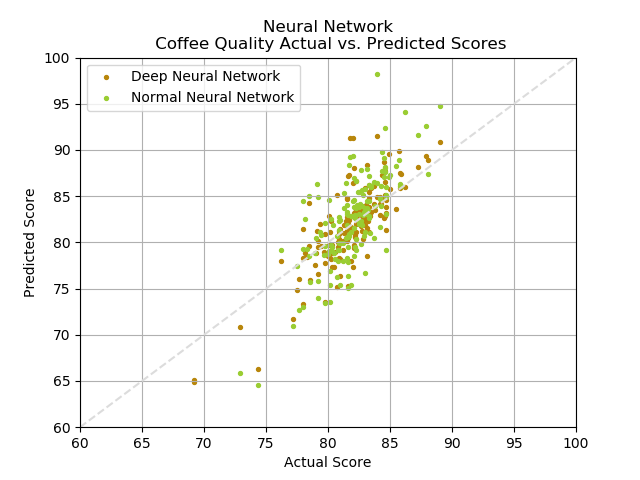

In [46]:
fig6, ax6 = plt.subplots()

ax6.scatter(nn_df['Actual'], nn_df['DNN Prediction'], color='darkgoldenrod', s=8, label='Deep Neural Network')
ax6.scatter(nn_df['Actual'], nn_df['NNN Prediction'], color='yellowgreen', s=8, label='Normal Neural Network')
plt.plot([60, 100], [60, 100], linestyle='dashed', color='gainsboro') # plot diagonal line
plt.title('Neural Network\n Coffee Quality Actual vs. Predicted Scores')
plt.ylabel('Predicted Score')
plt.xlim((60, 100))
plt.ylim((60, 100))
plt.grid()
plt.xlabel('Actual Score')
plt.legend()
fig6.savefig('Images_ADDING_FEATURES/NNN_vs_DNN_predictions_vs_actuals.jpg')
fig6.show()

# Analysis

Finally, we created summary plots for the models. Our first plot shows the actual vs. predicted coffee quality scores for each model, all on the same scale for comparison. It appears that the linear models produced the most accurate predictions. 

When we calculate the percent error for the predictions, we get an even clearer picture of the accuracy—the elasticnet and support vector regression (SVR) models have an error closest to zero. The random forest and neural network models clearly did not perform as well, with much higher (though still barely less than -.15%) percent error. If we remove the worst performing models from the chart, we can see the differences between the other models in slightly greater detail. The elasticnet and SVR models, however, still appear to have performed with similar accuracy.

We can also see that the R2 scores for the linear models are higher than the other models, surprisingly including SVR. 

At face value it appears the models with R2 scores close to 1 are the most accurate at predicting coffee quality scores, but we must also examine the residual plots to be sure. Residuals represent the difference between predicted and actual values. The closer they are to 0, the more accurate the model’s predictions are. Here we confirm that the linear models provided the most accurate predictions for coffee quality. Again, if we remove the neural networks from the comparison and rescale the charts to display the residuals with even more granularity, it is revealed that the elasticnet model had the smallest variance between actual and predicted scores. This combined with the model's high R2 score suggests that the **ElasticNet** model predicted coffee quality scores with the greatest accuracy.

<IPython.core.display.Javascript object>


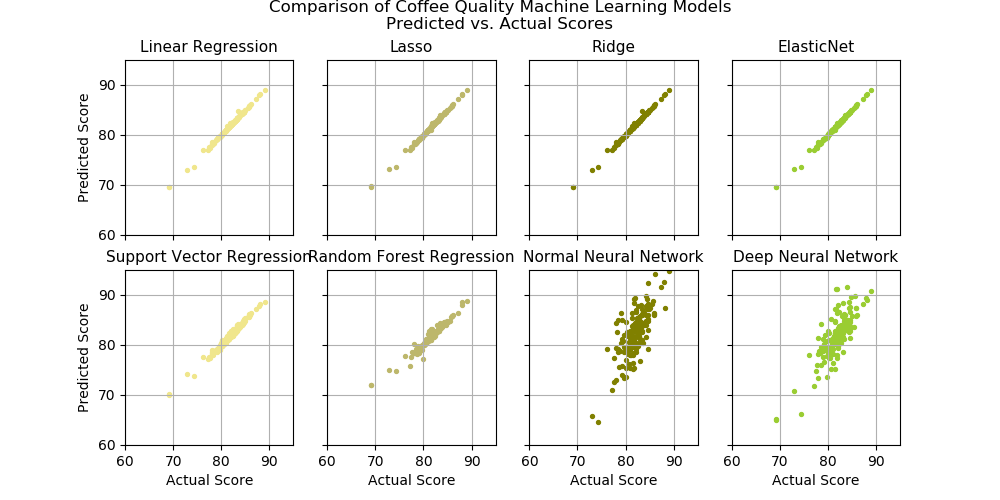

In [47]:
# overall results--subplots of all models separately
fig8, axs8 = plt.subplots(2,4, figsize=(10,5), sharex=True, sharey=True)

axs8[0, 0].scatter(linear_prediction_df['Actual'], linear_prediction_df['Linear Regression Prediction'], color='khaki', s=8)
axs8[0, 0].set_title('Linear Regression', size=11)

axs8[0, 1].scatter(linear_prediction_df['Actual'], linear_prediction_df['Lasso Prediction'], color='darkkhaki', s=8)
axs8[0, 1].set_title('Lasso', size=11)

axs8[0, 2].scatter(linear_prediction_df['Actual'], linear_prediction_df['Ridge Prediction'], color='olive', s=8)
axs8[0, 2].set_title('Ridge', size=11)

axs8[0, 3].scatter(linear_prediction_df['Actual'], linear_prediction_df['ElasticNet Prediction'], color='yellowgreen', s=8)
axs8[0, 3].set_title('ElasticNet', size=11)

axs8[1, 0].scatter(df_svr_predictions['Actual'], df_svr_predictions['Tuned Predictions'], color='khaki', s=8)
axs8[1, 0].set_title('Support Vector Regression', size=11)

axs8[1, 1].scatter(df_rfr_predictions['Actual'], df_rfr_predictions['Untuned Predictions'], color='darkkhaki', s=8)
axs8[1, 1].set_title('Random Forest Regression', size=11)

axs8[1, 2].scatter(nn_df['Actual'], nn_df['NNN Prediction'], color='olive', s=8)
axs8[1, 2].set_title('Normal Neural Network', size=11)

axs8[1, 3].scatter(nn_df['Actual'], nn_df['DNN Prediction'], color='yellowgreen', s=8)
axs8[1, 3].set_title('Deep Neural Network', size=11)

for ax in axs8.flat:
    ax.set(xlabel='Actual Score', ylabel='Predicted Score', xlim=[60, 95], ylim=[60, 95])
    ax.label_outer()
    ax.grid()

fig8.suptitle('Comparison of Coffee Quality Machine Learning Models\nPredicted vs. Actual Scores', y=1)
fig8.savefig('Images_ADDING_FEATURES/quality_model_comparison.jpg')
fig8.show()

In [48]:
# calculate prediction error for each model
lr_acc = (linear_prediction_df['Actual'] - linear_prediction_df['Linear Regression Prediction']) / linear_prediction_df['Actual'] * 100
lasso_acc = (linear_prediction_df['Actual'] - linear_prediction_df['Lasso Prediction']) / linear_prediction_df['Actual'] * 100
ridge_acc = (linear_prediction_df['Actual'] - linear_prediction_df['Ridge Prediction']) / linear_prediction_df['Actual'] * 100
elasticnet_acc = (linear_prediction_df['Actual'] - linear_prediction_df['ElasticNet Prediction']) / linear_prediction_df['Actual'] * 100
svr_acc = (df_svr_predictions['Actual'] - df_svr_predictions['Tuned Predictions']) / df_svr_predictions['Actual'] * 100
rfr_acc = (df_rfr_predictions['Actual'] - df_rfr_predictions['Tuned Predictions']) / df_rfr_predictions['Actual'] * 100
nnn_acc = (nn_df['Actual'] - nn_df['NNN Prediction']) / nn_df['Actual'] * 100
dnn_acc = (nn_df['Actual'] - nn_df['DNN Prediction']) / nn_df['Actual'] * 100

# average the prediction error for each model
LR = lr_acc.mean()
LA = lasso_acc.mean()
RR = ridge_acc.mean()
EN = elasticnet_acc.mean()
SV = svr_acc.mean()
RF = rfr_acc.mean()
NN = nnn_acc.mean()
DN = dnn_acc.mean()

<IPython.core.display.Javascript object>


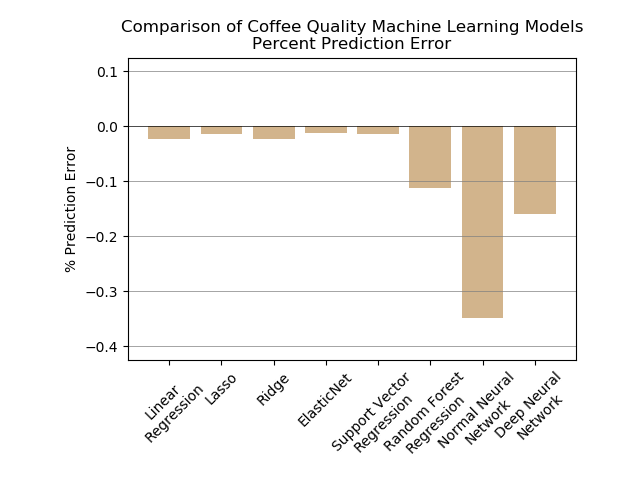

In [54]:
# plot percent error
perc_error = [LR, LA, RR, EN, SV, RF, NN, DN]
x_axis = ['Linear\nRegression', 'Lasso','Ridge', 'ElasticNet','Support Vector\nRegression', 'Random Forest\nRegression',
        'Normal Neural\nNetwork', 'Deep Neural\nNetwork']

fig9, ax9 = plt.subplots()

ax9.bar(x_axis, perc_error, color='tan', align='center')
fig9.subplots_adjust(bottom=0.25, left=.2)
plt.xticks(rotation=45)
plt.title('Comparison of Coffee Quality Machine Learning Models\nPercent Prediction Error')
plt.ylabel('% Prediction Error')
plt.axhline(y=.1, color='gray',linewidth=.5)
plt.axhline(y=0, color='black', linewidth=.5)
plt.axhline(y=-.1, color='gray', linewidth=.5)
plt.axhline(y=-.2, color='gray', linewidth=.5)
plt.axhline(y=-.3, color='gray', linewidth=.5)
plt.axhline(y=-.4, color='gray', linewidth=.5)
fig9.savefig('Images_ADDING_FEATURES/quality_model_ppe.jpg')
fig9.show()

<IPython.core.display.Javascript object>


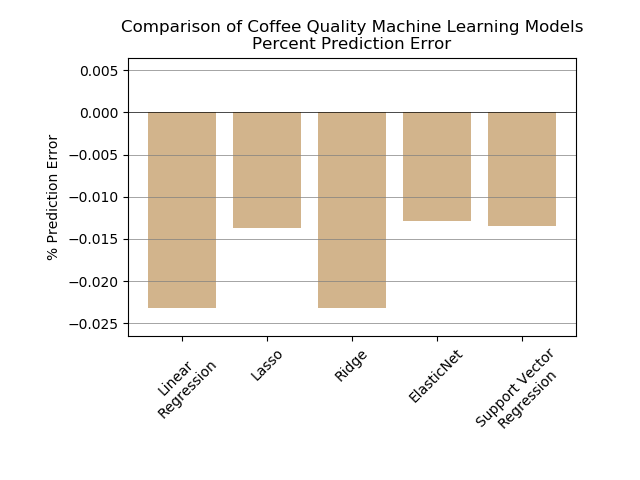

In [50]:
# plot percent error WITHOUT NEURAL NETWORKS
perc_error_A = [LR, LA, RR, EN, SV]
x_axis_A = ['Linear\nRegression', 'Lasso','Ridge', 'ElasticNet','Support Vector\nRegression']

fig9a, ax9a = plt.subplots()

ax9a.bar(x_axis_A, perc_error_A, color='tan', align='center')
fig9a.subplots_adjust(bottom=0.3, left=.2)
plt.xticks(rotation=45)
plt.title('Comparison of Coffee Quality Machine Learning Models\nPercent Prediction Error')
plt.ylabel('% Prediction Error')
plt.axhline(y=.005, color='gray', linewidth=.5)
plt.axhline(y=0, color='black', linewidth=.5)
plt.axhline(y=-.005, color='gray', linewidth=.5)
plt.axhline(y=-.01, color='gray', linewidth=.5)
plt.axhline(y=-.015, color='gray', linewidth=.5)
plt.axhline(y=-.02, color='gray', linewidth=.5)
plt.axhline(y=-.025, color='gray', linewidth=.5)
fig9a.savefig('Images_ADDING_FEATURES/quality_model_ppe_no_neural_networks.jpg')
fig9a.show()

<IPython.core.display.Javascript object>


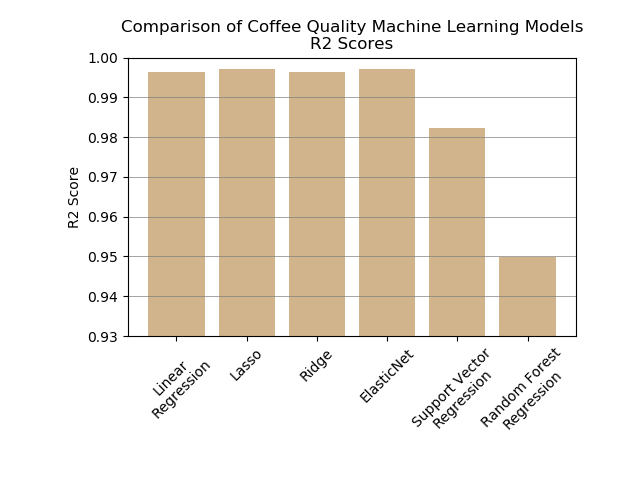

In [51]:
# plot R2 score
x_axis2 = ['Linear\nRegression', 'Lasso','Ridge', 'ElasticNet','Support Vector\nRegression', 'Random Forest\nRegression']
r2_scores = [linregress.score(X_test, y_test), lasso.score(X_test, y_test),
            ridge.score(X_test, y_test), elasticnet.score(X_test, y_test),
            model_svr_retuned.score(X_test, y_test), model_rfr.score(X_test, y_test)]

fig10, ax10 = plt.subplots()

ax10.bar(x_axis2, r2_scores, color='tan', align='center')
fig10.subplots_adjust(bottom=0.3, left=.2)
plt.xticks(rotation=45)
plt.ylim((0.93,1))
plt.title('Comparison of Coffee Quality Machine Learning Models\nR2 Scores')
plt.ylabel('R2 Score')
plt.axhline(y=.94, color='gray', linewidth=.5)
plt.axhline(y=.95, color='gray', linewidth=.5)
plt.axhline(y=.96, color='gray', linewidth=.5)
plt.axhline(y=.97, color='gray', linewidth=.5)
plt.axhline(y=.98, color='gray', linewidth=.5)
plt.axhline(y=.99, color='gray', linewidth=.5)

fig10.savefig('Images_ADDING_FEATURES/quality_model_r2.jpg')
fig10.show()

<IPython.core.display.Javascript object>


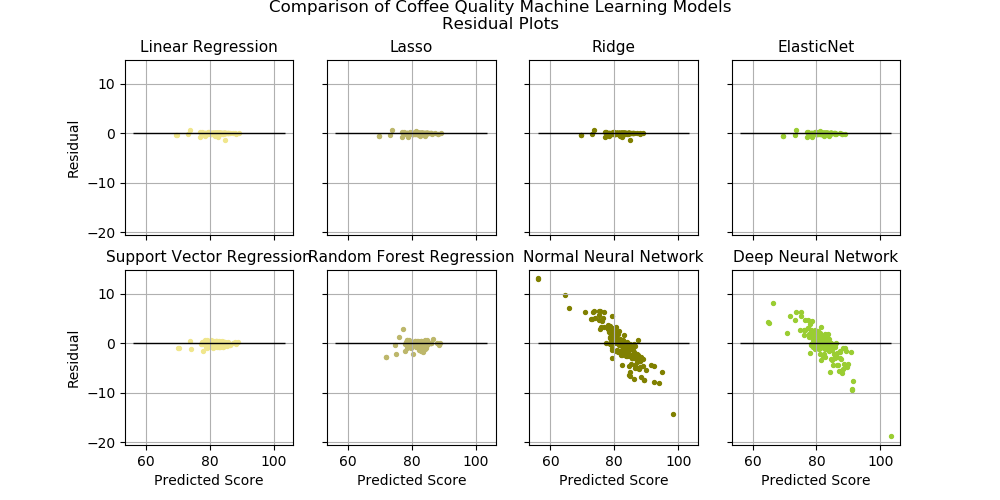

In [52]:
# plot residuals
xmin=(nn_df['NNN Prediction']).min()
xmax=(nn_df['DNN Prediction']).max()

fig11, ax11 = plt.subplots(2,4, figsize=(10,5), sharex=True, sharey=True)

ax11[0, 0].scatter(linear_prediction_df['Linear Regression Prediction'], 
                    linear_prediction_df['Actual'] - linear_prediction_df['Linear Regression Prediction'], 
                    color='khaki', s=8)
ax11[0, 0].set_title('Linear Regression', size=11)

ax11[0, 1].scatter(linear_prediction_df['Lasso Prediction'], 
                    linear_prediction_df['Actual'] - linear_prediction_df['Lasso Prediction'], 
                    color='darkkhaki', s=8)
ax11[0, 1].set_title('Lasso', size=11)

ax11[0, 2].scatter(linear_prediction_df['Ridge Prediction'], 
                    linear_prediction_df['Actual'] - linear_prediction_df['Ridge Prediction'], 
                    color='olive', s=8)
ax11[0, 2].set_title('Ridge', size=11)

ax11[0, 3].scatter(linear_prediction_df['ElasticNet Prediction'], 
                    linear_prediction_df['Actual'] - linear_prediction_df['ElasticNet Prediction'], 
                    color='yellowgreen', s=8)
ax11[0, 3].set_title('ElasticNet', size=11)

ax11[1, 0].scatter(df_svr_predictions['Tuned Predictions'],
                    df_svr_predictions['Actual'] - df_svr_predictions['Tuned Predictions'], 
                    color='khaki', s=8)
ax11[1, 0].set_title('Support Vector Regression', size=11)

ax11[1, 1].scatter(df_rfr_predictions['Untuned Predictions'], 
                    df_rfr_predictions['Actual'] - df_rfr_predictions['Untuned Predictions'], 
                    color='darkkhaki', s=8)
ax11[1, 1].set_title('Random Forest Regression', size=11)

ax11[1, 2].scatter(nn_df['NNN Prediction'], nn_df['Actual'] - nn_df['NNN Prediction'], color='olive', s=8)
ax11[1, 2].set_title('Normal Neural Network', size=11)

ax11[1, 3].scatter(nn_df['DNN Prediction'], nn_df['Actual'] - nn_df['DNN Prediction'], color='yellowgreen', s=8)
ax11[1, 3].set_title('Deep Neural Network', size=11)

for ax in ax11.flat:
    ax.set(xlabel='Predicted Score', ylabel='Residual')
    ax.hlines(y=0, xmin=xmin, xmax=xmax, color='black', linewidth=1)
    ax.label_outer()
    ax.grid()

fig11.suptitle('Comparison of Coffee Quality Machine Learning Models\nResidual Plots', y=1)
fig11.savefig('Images_ADDING_FEATURES/quality_residual_plots.jpg')
fig11.show()

<IPython.core.display.Javascript object>


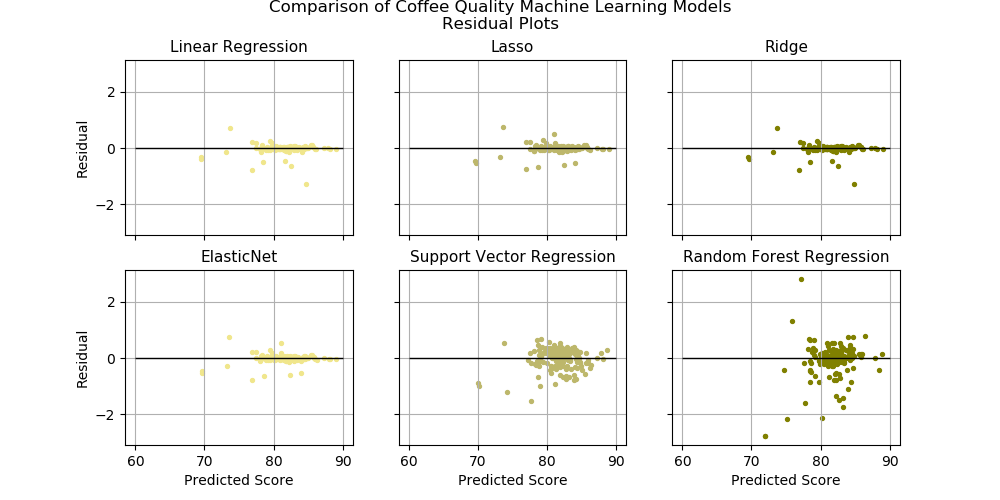

In [53]:
# plot residuals WITHOUT NEURAL NETWORKS
xmin=(nn_df['NNN Prediction']).min()
xmax=(nn_df['NNN Prediction']).max()

fig11a, ax11a = plt.subplots(2,3, figsize=(10,5), sharex=True, sharey=True)

ax11a[0, 0].scatter(linear_prediction_df['Linear Regression Prediction'], 
                    linear_prediction_df['Actual'] - linear_prediction_df['Linear Regression Prediction'], 
                    color='khaki', s=8)
ax11a[0, 0].set_title('Linear Regression', size=11)

ax11a[0, 1].scatter(linear_prediction_df['Lasso Prediction'], 
                    linear_prediction_df['Actual'] - linear_prediction_df['Lasso Prediction'], 
                    color='darkkhaki', s=8)
ax11a[0, 1].set_title('Lasso', size=11)

ax11a[0, 2].scatter(linear_prediction_df['Ridge Prediction'], 
                    linear_prediction_df['Actual'] - linear_prediction_df['Ridge Prediction'], 
                    color='olive', s=8)
ax11a[0, 2].set_title('Ridge', size=11)

ax11a[1, 0].scatter(linear_prediction_df['ElasticNet Prediction'], 
                    linear_prediction_df['Actual'] - linear_prediction_df['ElasticNet Prediction'], 
                    color='khaki', s=8)
ax11a[1, 0].set_title('ElasticNet', size=11)

ax11a[1, 1].scatter(df_svr_predictions['Tuned Predictions'],
                    df_svr_predictions['Actual'] - df_svr_predictions['Tuned Predictions'], 
                    color='darkkhaki', s=8)
ax11a[1, 1].set_title('Support Vector Regression', size=11)

ax11a[1, 2].scatter(df_rfr_predictions['Untuned Predictions'], 
                    df_rfr_predictions['Actual'] - df_rfr_predictions['Untuned Predictions'], 
                    color='olive', s=8)
ax11a[1, 2].set_title('Random Forest Regression', size=11)

for ax in ax11a.flat:
    ax.set(xlabel='Predicted Score', ylabel='Residual')
    ax.hlines(y=0, xmin=60, xmax=90, color='black', linewidth=1)
    ax.label_outer()
    ax.grid()

fig11a.suptitle('Comparison of Coffee Quality Machine Learning Models\nResidual Plots', y=1)
fig11a.savefig('Images_ADDING_FEATURES/quality_residual_plots_no_neural_networks.jpg')
fig11a.show()